SULTAN
56189
BD/DS-5_1

Classification (synthetic binary dataset + metrics)

Classification Metrics (Synthetic Dataset)

Purpose: Evaluate the performance of a binary classifier using multiple metrics (Accuracy, Precision, Recall, F1-score, MCC, ROC AUC, PR AUC) and visualize results.

Steps:

Install & Import Libraries

scikit-learn → Dataset creation, model, and metrics

numpy → Array operations

matplotlib.pyplot → Visualization

Create Synthetic Dataset

make_classification generates 2000 samples with 20 features, 5 informative, 2 redundant, 85/15 class imbalance, and slight label noise.

Train-Test Split

70% train, 30% test, stratify=y to preserve class distribution.

Train Classifier

Logistic Regression is trained; predicts class labels (y_pred) and probabilities (y_score) for positive class.

Compute Metrics

Accuracy: Correct predictions / total

Precision: TP / (TP + FP)

Recall: TP / (TP + FN)

F1-score: Harmonic mean of Precision & Recall

Matthews Correlation Coefficient (MCC): Correlation between predicted & true labels (good for imbalanced datasets)

ROC AUC: Area under ROC curve

Average Precision (PR AUC): Area under Precision-Recall curve

Precision-Recall & ROC Curve Data

Prepares values for plotting precision-recall and ROC curves.

Print Metrics

Displays numeric values for all metrics.

Optional Plots

Left: Precision-Recall curve

Right: ROC curve

Visualize classifier performance.

Classification metrics (synthetic dataset):
Accuracy:         0.8367
Precision:        0.4074
Recall:           0.1183
F1-score:         0.1833
MCC:              0.1514
ROC AUC:          0.8241
Average Precision (PR AUC): 0.3846


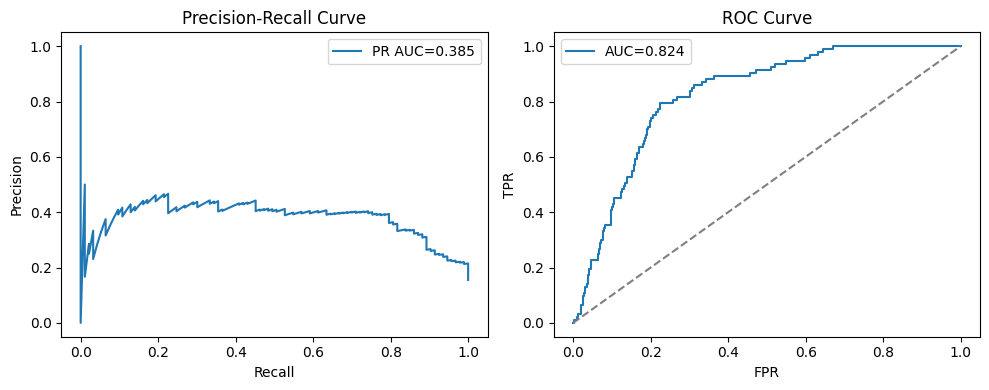

In [1]:
# CELL 1: Classification metrics (synthetic dataset)
# Run this cell in Colab.
# Installs (usually sklearn is preinstalled in Colab; kept as check)
!pip install -q scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             matthews_corrcoef, precision_recall_curve, roc_curve,
                             roc_auc_score, average_precision_score)

# 1) Create synthetic dataset (binary)
X, y = make_classification(n_samples=2000, n_features=20, n_informative=5,
                           n_redundant=2, n_repeated=0, n_clusters_per_class=2,
                           weights=[0.85, 0.15], flip_y=0.01, random_state=42)

# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3) Fit classifier (Logistic Regression provides probabilities)
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]  # predicted probability for positive class

# 4) Compute classification metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)
auc = roc_auc_score(y_test, y_score)
avg_prec = average_precision_score(y_test, y_score)  # area under PR curve

# 5) Precision-Recall and ROC curve data (for plotting if you want)
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_score)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_score)

# Print results
print("Classification metrics (synthetic dataset):")
print(f"Accuracy:         {acc:.4f}")
print(f"Precision:        {prec:.4f}")
print(f"Recall:           {rec:.4f}")
print(f"F1-score:         {f1:.4f}")
print(f"MCC:              {mcc:.4f}")
print(f"ROC AUC:          {auc:.4f}")
print(f"Average Precision (PR AUC): {avg_prec:.4f}")

# Optional: quick plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(recall_curve, precision_curve, label=f'PR AUC={avg_prec:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend()
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'AUC={auc:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()
plt.tight_layout()
plt.show()


Clustering (synthetic blobs + metrics including Dunn index & RMSE)

Clustering Metrics (Synthetic Blobs)

Purpose: Evaluate unsupervised clustering with internal and external metrics, and visualize clusters.

Steps:

Install & Import Libraries

make_blobs → Synthetic clusters

KMeans → Clustering

Metrics → Internal (silhouette, Davies-Bouldin, Dunn), External (Rand Index, ARI, homogeneity, completeness, V-measure)

Create Synthetic Dataset

1000 samples, 4 clusters, cluster_std=0.6 for compactness.

Fit KMeans

k=4 clusters

labels → cluster assignments

centroids → cluster centers

Internal Metrics

Silhouette Score: Measures cohesion vs separation (-1 to 1)

Davies-Bouldin Index: Ratio of intra-cluster to inter-cluster distances (lower better)

Dunn Index (custom): Ratio of minimum inter-cluster distance to maximum intra-cluster distance (higher better)

External Metrics

Adjusted Rand Index (ARI): Corrects for chance

Rand Index: Similarity of predicted vs true clustering

Homogeneity: Cluster contains only one class

Completeness: All members of a class assigned to one cluster

V-measure: Harmonic mean of homogeneity & completeness

Centroid-based Error (RMSE)

Measures compactness: average distance from points to assigned centroid.

Print Metrics & Optional Visualization

Visualize clusters and centroids for intuitive understanding.

Clustering metrics (synthetic blobs):
Silhouette Score: 0.8753
Davies-Bouldin Index: 0.1755 (lower better)
Dunn Index: 0.8134 (higher better)
Rand Index: 1.0000
Adjusted Rand Index (ARI): 1.0000
Homogeneity: 1.0000
Completeness: 1.0000
V-Measure: 1.0000
RMSE to centroids: 0.8379


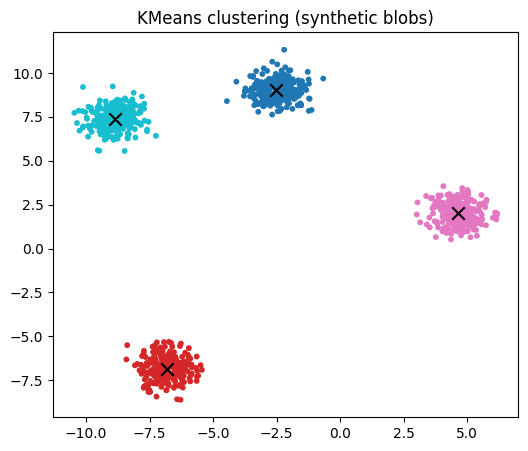

In [2]:
# CELL 2: Clustering metrics (synthetic blobs)
# Run this cell in Colab.
!pip install -q scikit-learn scipy numpy matplotlib

import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             adjusted_rand_score, homogeneity_score,
                             completeness_score, v_measure_score, rand_score)
from scipy.spatial.distance import cdist, pdist, squareform

# 1) Create synthetic clustering dataset
X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=[0.6, 0.6, 0.6, 0.6], random_state=42)

# 2) Fit KMeans
k = 4
km = KMeans(n_clusters=k, random_state=42)
labels = km.fit_predict(X)
centroids = km.cluster_centers_

# 3) Internal metrics
sil = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)

# 4) Dunn Index (custom implementation)
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    # intra-cluster diameters (max distance within cluster)
    max_intra = 0.0
    for lab in unique_labels:
        pts = X[labels == lab]
        if pts.shape[0] <= 1:
            diam = 0.0
        else:
            diam = np.max(pdist(pts))
        if diam > max_intra:
            max_intra = diam
    # inter-cluster distances (min distance between clusters)
    min_inter = np.inf
    for i, a in enumerate(unique_labels):
        for b in unique_labels[i+1:]:
            pts_a = X[labels == a]
            pts_b = X[labels == b]
            d = np.min(cdist(pts_a, pts_b))
            if d < min_inter:
                min_inter = d
    if max_intra == 0.0:
        return np.inf
    return min_inter / max_intra

dunn = dunn_index(X, labels)

# 5) External metrics
# Note: sklearn's rand_score exists in newer versions; adjusted_rand_score widely used
ari = adjusted_rand_score(y_true, labels)
# If rand_score not available, you can compute using sklearn.metrics.contingency_matrix; we will try direct call
try:
    ri = rand_score(y_true, labels)
except Exception:
    # fallback: compute Rand Index manually (slow but fine for demo)
    from itertools import combinations
    n = len(y_true)
    agree = 0
    total = 0
    for i, j in combinations(range(n), 2):
        same_true = (y_true[i] == y_true[j])
        same_pred = (labels[i] == labels[j])
        if same_true == same_pred:
            agree += 1
        total += 1
    ri = agree / total

homo = homogeneity_score(y_true, labels)
comp = completeness_score(y_true, labels)
v = v_measure_score(y_true, labels)

# 6) RMSE of data points to their assigned centroid (centroid-based error)
distances = np.linalg.norm(X - centroids[labels], axis=1)
rmse = np.sqrt(np.mean(distances**2))

# Print results
print("Clustering metrics (synthetic blobs):")
print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f} (lower better)")
print(f"Dunn Index: {dunn:.4f} (higher better)")
print(f"Rand Index: {ri:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Homogeneity: {homo:.4f}")
print(f"Completeness: {comp:.4f}")
print(f"V-Measure: {v:.4f}")
print(f"RMSE to centroids: {rmse:.4f}")

# Optional visualization
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap='tab10')
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=80, marker='x')
plt.title('KMeans clustering (synthetic blobs)')
plt.show()


Reinforcement Learning (simple REINFORCE + baseline on CartPole)

Reinforcement Learning Metrics (REINFORCE with Baseline on CartPole)

Purpose: Train a REINFORCE policy gradient agent with baseline and evaluate RL metrics like return, variance, success rate, and loss.

Steps:

Install & Import Libraries

gymnasium → RL environment

torch → Neural networks

numpy → Array operations

Define Networks

PolicyNet → Actor network outputs action probabilities

ValueNet → Critic baseline estimates state value

Run an Episode

Simulate environment until termination

Store states, actions, rewards, log-probabilities

Hyperparameters & Initialization

Learning rates, discount factor (gamma=0.99), number of episodes, environment setup

Training Loop

Run one episode

Compute discounted returns

Normalize returns for stability

Compute value loss (MSE) for baseline

Compute advantage = returns - baseline

Compute policy loss = negative log probability * advantage

Backpropagate & update networks

Record Metrics

Episode return, policy loss, value loss per episode

Final Metrics

Average return over last 50 episodes

Return variance

Success rate (episodes with return ≥ 475)

Average policy loss

Average value MSE

Optional Learning Curve Plot

Plot returns per episode to visualize learning progress

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.28.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Episode 1/200 | Return (last): 13.0 | AvgReturn(20): 13.00 | PolicyLoss: 777.036 | ValueLoss: 56.337
Episode 20/200 | Return (last): 20.0 | AvgReturn(20): 24.15 | PolicyLoss: 2166.012 | ValueLoss: 90.045
Episode 40/200 | Return (last): 13.0 | AvgReturn(20): 25.35 | PolicyLoss: 124.460 | ValueLoss: 23.015
Episode 60/200 | Return (last): 9.0 | AvgReturn(20): 23.90 | PolicyLoss: -294.904 | ValueLoss: 31.556
Episode 80/200 | Return

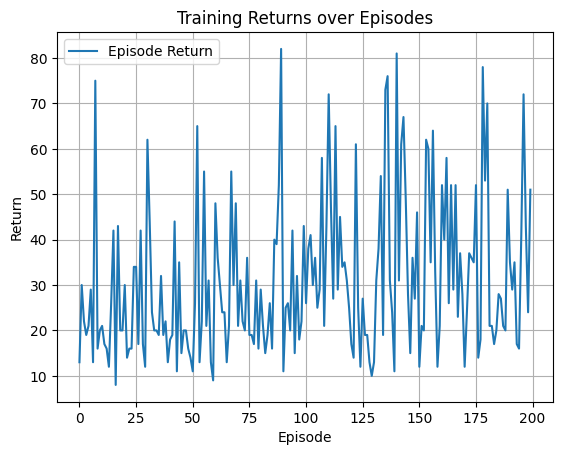

In [3]:
# CELL 3: Reinforcement Learning metrics (REINFORCE with baseline on CartPole-v1)
# Run this in Colab. Installs gymnasium and torch if not present.
!pip install -q gymnasium==0.28.1      # specific stable-ish version; adjust if needed
!pip install -q gymnasium[accept-rom-license]  # may be required for some envs
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

# Simple policy network (actor) and value network (critic baseline)
class PolicyNet(nn.Module):
    def __init__(self, obs_size, n_actions):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, 128),
            nn.ReLU(),
            nn.Linear(128, n_actions),
            nn.Softmax(dim=-1)
        )
    def forward(self, x):
        return self.net(x)

class ValueNet(nn.Module):
    def __init__(self, obs_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

# Utility: run episodes and compute returns
def run_episode(env, policy, device):
    obs, _ = env.reset()
    obs = torch.tensor(obs, dtype=torch.float32).to(device)
    done = False
    rewards = []
    log_probs = []
    states = []
    actions = []
    while True:
        probs = policy(obs.unsqueeze(0))
        m = torch.distributions.Categorical(probs)
        action = m.sample()
        log_prob = m.log_prob(action)
        next_obs, reward, terminated, truncated, _ = env.step(int(action.item()))
        done_flag = terminated or truncated
        rewards.append(reward)
        log_probs.append(log_prob)
        states.append(obs.cpu().numpy())
        actions.append(action.item())
        if done_flag:
            break
        obs = torch.tensor(next_obs, dtype=torch.float32).to(device)
    return rewards, log_probs, states, actions

# Hyperparameters
env_name = "CartPole-v1"
device = torch.device("cpu")
env = gym.make(env_name)
obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n

policy = PolicyNet(obs_size, n_actions).to(device)
value_net = ValueNet(obs_size).to(device)

policy_opt = optim.Adam(policy.parameters(), lr=1e-3)
value_opt = optim.Adam(value_net.parameters(), lr=5e-3)

gamma = 0.99
num_episodes = 200  # small for demo; increase for better learning
print_every = 20

episode_returns = []
policy_losses = []
value_losses = []

for ep in range(1, num_episodes + 1):
    # run one episode
    rewards, log_probs, states, actions = run_episode(env, policy, device)

    # compute discounted returns
    returns = []
    G = 0
    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)
    returns = torch.tensor(returns, dtype=torch.float32).to(device)
    states_t = torch.tensor(np.array(states), dtype=torch.float32).to(device)
    log_probs_t = torch.stack(log_probs).to(device)

    # normalize returns for stability
    returns_norm = (returns - returns.mean()) / (returns.std() + 1e-8)

    # VALUE LOSS: fit baseline to returns (MSE)
    value_preds = value_net(states_t)
    value_loss = nn.functional.mse_loss(value_preds, returns)
    value_opt.zero_grad()
    value_loss.backward()
    value_opt.step()

    # ADVANTAGE = returns - baseline
    advantage = returns - value_preds.detach()
    # POLICY LOSS (REINFORCE with baseline)
    policy_loss = - (log_probs_t * advantage).sum()
    policy_opt.zero_grad()
    policy_loss.backward()
    policy_opt.step()

    # record metrics
    ep_return = float(sum(rewards))
    episode_returns.append(ep_return)
    policy_losses.append(policy_loss.item())
    value_losses.append(value_loss.item())

    if ep % print_every == 0 or ep == 1:
        avg_return = np.mean(episode_returns[-print_every:])
        print(f"Episode {ep}/{num_episodes} | Return (last): {ep_return:.1f} | AvgReturn({print_every}): {avg_return:.2f} | PolicyLoss: {policy_loss.item():.3f} | ValueLoss: {value_loss.item():.3f}")

# Final RL metrics
avg_return = np.mean(episode_returns[-50:])  # average of last 50 episodes
return_variance = np.var(episode_returns[-50:])
success_threshold = 475  # CartPole-v1 solved roughly at 500, use 475 as high-success threshold
success_rate = np.mean([1.0 if r >= success_threshold else 0.0 for r in episode_returns])

# Value function error estimate: MSE between predicted values and true returns on last episode states (approx)
# We'll compute average value loss recorded as proxy
avg_value_loss = np.mean(value_losses)
avg_policy_loss = np.mean(policy_losses)

print("\n=== Reinforcement Learning Metrics (REINFORCE with baseline) ===")
print(f"Average return (last 50 eps): {avg_return:.3f}")
print(f"Return variance (last 50 eps): {return_variance:.3f}")
print(f"Success rate (episodes with return >= {success_threshold}): {success_rate*100:.2f}%")
print(f"Average policy loss (per episode): {avg_policy_loss:.4f}")
print(f"Average value MSE (per episode): {avg_value_loss:.6f}")

# Optional: plot learning curve
import matplotlib.pyplot as plt
plt.plot(episode_returns, label='Episode Return')
plt.xlabel('Episode'); plt.ylabel('Return'); plt.title('Training Returns over Episodes')
plt.grid(True); plt.legend()
plt.show()

env.close()
